# Chapter 5: The Beta Distribution
## Q1. 
You want to use the beta distribution to determine whether or not a
coin you have is a fair coin—meaning that the coin gives you heads and
tails equally. You flip the coin 10 times and get 4 heads and 6 tails. Using
the beta distribution, what is the probability that the coin will land on
heads more than 60 percent of the time?

In [4]:
from scipy.stats import beta

In [5]:
betacdf = beta(4,6).cdf

betacdf(1.0) - betacdf(0.6)

0.09935257600000003

## Q2. 
You flip the coin 10 more times and now have 9 heads and 11 tails
total. What is the probability that the coin is fair, using our definition of
fair, give or take 5 percent?

In [6]:
betacdf = beta(9,11).cdf

betacdf(0.55) - betacdf(0.45)

0.3098800156513042

## Q3. 
Data is the best way to become more confident in your assertions. You
flip the coin 200 more times and end up with 109 heads and 111 tails. Now
what is the probability that the coin is fair, give or take 5 percent?

In [7]:
betacdf = beta(109,111).cdf

betacdf(0.55) - betacdf(0.45)

0.8589371426532354

# Chapter 6: Conditional Probability
## Q1. 
What piece of information would we need in order to use Bayes’
theorem to determine the probability that someone in 2010 who had GBS
also had the flu vaccine that year?

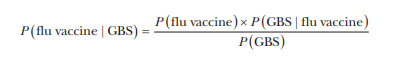

## Q2. 
What is the probability that a random person picked from the
population is female and is not color blind?

In [10]:
p_female = 0.5
p_colorblind_given_f = 0.005
p_notcolorblind_female = p_female*(1-p_colorblind_given_f)
p_notcolorblind_female

0.4975

## Q3. 
What is the probability that a male who received the flu vaccine in
2010 is either color blind or has GBS?

In [20]:
p_GBS_given_fvac = 3/100000
p_colorblind_given_m = 0.08
p_male = 0.5
p_male_and_colorblind = p_colorblind_given_m * p_male #gives 0.04 not 0.004 as described in book solutions.

p_male_and_colorblind + p_GBS_given_fvac - p_male_and_colorblind * p_GBS_given_fvac

0.0400288